In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [8]:
df = pd.read_csv("Advertising.csv")

In [9]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,06-09-2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,07-09-2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,07-09-2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,07-09-2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,07-09-2017,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [23]:
df.dtypes

TV                 float64
radio              float64
newspaper          float64
sales              float64
total_spend        float64
predicted_sales    float64
dtype: object

In [24]:
df.isnull().sum()

TV                 0
radio              0
newspaper          0
sales              0
total_spend        0
predicted_sales    0
dtype: int64

In [14]:
df["total_spend"] = df["TV"] + df["radio"] +df["newspaper"]
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


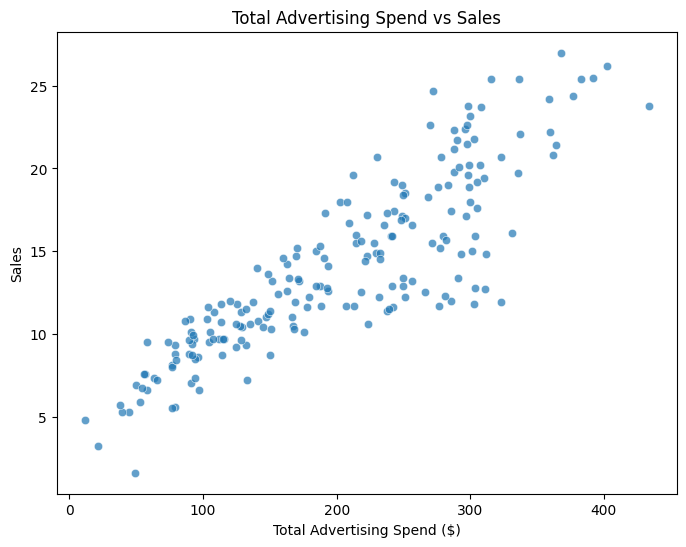

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["total_spend"], y=df["sales"], alpha=0.7)
plt.xlabel("Total Advertising Spend ($)")
plt.ylabel("Sales")
plt.title("Total Advertising Spend vs Sales")
plt.show()

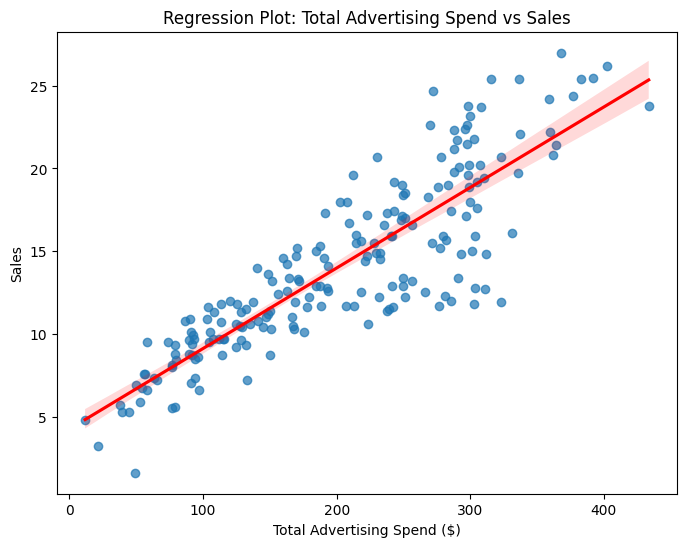

In [16]:
plt.figure(figsize=(8,6))
sns.regplot(x=df["total_spend"], y=df["sales"], scatter_kws={'alpha':0.7}, line_kws={"color":"red"})
plt.xlabel("Total Advertising Spend ($)")
plt.ylabel("Sales")
plt.title("Regression Plot: Total Advertising Spend vs Sales")
plt.show()

In [ ]:
X = df[["total_spend"]].values 
y = df["sales"].values

In [18]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [19]:
B0 = model.intercept_  # Intercept
B1 = model.coef_[0]    # Slope
print(f"Intercept (B0): {B0}")
print(f"Slope (B1): {B1}")

Intercept (B0): 4.243028216036331
Slope (B1): 0.048687879319048145


In [20]:

df["predicted_sales"] = B1 * df["total_spend"] + B0


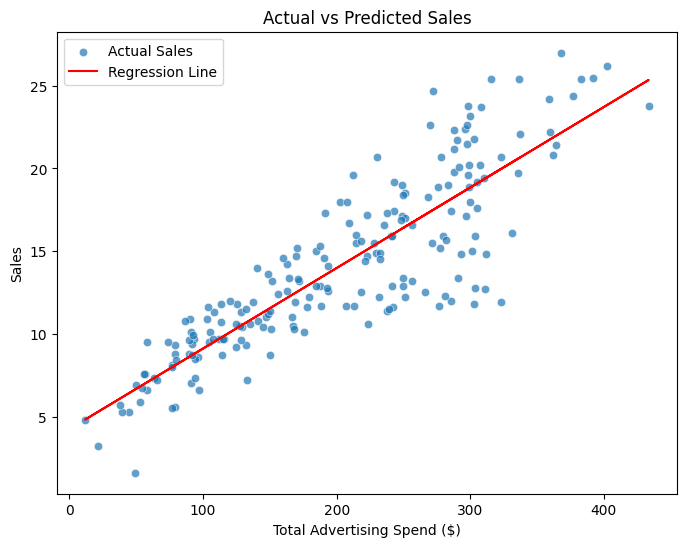

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["total_spend"], y=df["sales"], label="Actual Sales", alpha=0.7)
plt.plot(df["total_spend"], df["predicted_sales"], color='red', label="Regression Line")
plt.xlabel("Total Advertising Spend ($)")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

In [22]:
spend_200 = np.array([[200]])
predicted_sales_200 = model.predict(spend_200)
print(f"Predicted sales when total spend is $200: {predicted_sales_200[0]:.2f}")

Predicted sales when total spend is $200: 13.98
